1. Spam Data

        a. Load the spam data set.
        b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
        c. Is there any overlap in the bigrams for the spam data and the ham data?
        d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

# a. Load the spam data set.
df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
df['cleaned_text'] = df['text'].apply(clean)
df.head()

,label,text,cleaned_text
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"


In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [8]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [9]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,600,241,359
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5
free,275,59,216
know,267,241,26


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

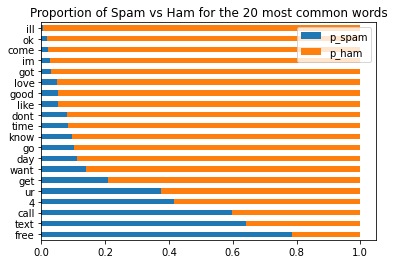

In [11]:
# c. Is there any overlap in the bigrams for the spam data and the ham data?
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [18]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [19]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

In [20]:
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

(-0.5, 799.5, 599.5, -0.5)

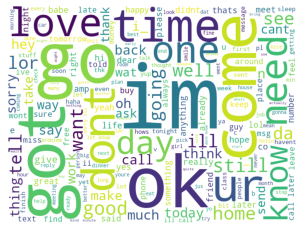

In [22]:
plt.imshow(ham_cloud)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

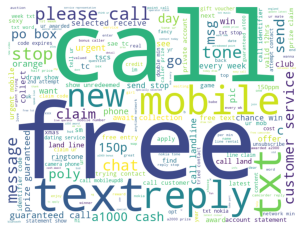

In [23]:
plt.imshow(spam_cloud)
plt.axis('off')

d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [24]:
top_20_spam_bigrams_3 = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))
top_20_spam_bigrams_3.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

In [25]:
top_20_ham_bigrams_3 = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))
top_20_ham_bigrams_3.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
dtype: int64

2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [26]:
blog = pd.read_csv('clean_blog_posts.csv')
blog.head()

,title,content,date_published,clean,stemmed,lemmatized
0,Mental Health First Aid Training - Codeup,\n\n\n\n\n\nMental Health First Aid Training\n...,"May 31, 2022",mental health first aid training may 31 2022 t...,mental health first aid train may 31 2022 tip ...,mental health first aid training may 31 2022 t...
1,5 Reasons To Attend Our New Cloud Administrati...,\n\n\n\n\n\n5 Reasons To Attend Our New Cloud ...,"May 17, 2022",5 reasons attend new cloud administration prog...,5 reason attend new cloud administr program ma...,5 reason attend new cloud administration progr...
2,What Jobs Can You Get After a Coding Bootcamp?,\n\n\n\n\n\nWhat Jobs Can You Get After a Codi...,"Jul 7, 2022",jobs get coding bootcamp part 1 data science j...,job get code bootcamp part 1 data scienc jul 7...,job get coding bootcamp part 1 data science ju...
3,What Jobs Can You Get After a Coding Bootcamp?...,\n\n\n\n\n\nWhat Jobs Can You Get After a Codi...,"Jul 14, 2022",jobs get coding bootcamp part 2 cloud administ...,job get code bootcamp part 2 cloud administr j...,job get coding bootcamp part 2 cloud administr...
4,Codeup TV Commercial - Codeup News,"\n\n\n\n\n\nCodeup TV Commercial\nJul 20, 2022...","Jul 20, 2022",codeup tv commercial jul 20 2022 codeup news c...,codeup tv commerci jul 20 2022 codeup news cod...,codeup tv commercial jul 20 2022 codeup news c...


In [27]:
cols = ['content','clean','stemmed']
blog = blog.drop(columns = cols)
blog.head()

,title,date_published,lemmatized
0,Mental Health First Aid Training - Codeup,"May 31, 2022",mental health first aid training may 31 2022 t...
1,5 Reasons To Attend Our New Cloud Administrati...,"May 17, 2022",5 reason attend new cloud administration progr...
2,What Jobs Can You Get After a Coding Bootcamp?,"Jul 7, 2022",job get coding bootcamp part 1 data science ju...
3,What Jobs Can You Get After a Coding Bootcamp?...,"Jul 14, 2022",job get coding bootcamp part 2 cloud administr...
4,Codeup TV Commercial - Codeup News,"Jul 20, 2022",codeup tv commercial jul 20 2022 codeup news c...


3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.